In [1]:
# Import the necessary packages and data
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set()
path = os.path.expanduser('~/Projects/capstone-two/data/processed/Clean_Harbor_Water_Quality.csv', )
wq_df = pd.read_csv(path, parse_dates=['Sample Date'], index_col=0)

In [2]:
times = []
for i in wq_df['Sample Time']:
    try:
        times.append(datetime.strptime(i, '%I:%M%p').time())
    except:
        times.append(np.nan)
wq_df['Sample Time'] = times

I will now examine the descriptive statistics of each column to identify values that are unexpectedly high or low.

In [3]:
wq_df_int = wq_df.select_dtypes(exclude=['object', 'datetime'])
wq_df_int_subset = wq_df_int.iloc[:, :10]
wq_df_int_subset.describe()

,Top Sample Temperature (ºC),Bottom Sample Temperature (ºC),Site Actual Depth (ft),Top Sample Depth(ft),Bottom Sample Depth (ft),Top Salinity (psu),Bottom Salinity (psu),Top Conductivity (S/m),Bottom Conductivity (S/m),"CTD (conductivity, temperature, depth profiler) Top Dissolved Oxygen (mg/L)"
count,18996.000000,17733.000000,27886.000000,18939.000000,17836.000000,18968.000000,17720.000000,18758.000000,17528.000000,16217.000000
mean,18.703483,18.002141,28.630030,3.380010,32.244005,22.866737,24.809579,3.837574,4.090200,6.851332
std,6.801709,6.523780,21.298745,0.749955,20.358388,5.269741,3.794550,4.396670,4.665498,2.871964
min,-1.740000,-1.870000,0.020000,0.700000,1.000000,0.120000,0.200000,0.020000,0.000000,-1.120000
25%,15.737500,15.000000,14.000000,3.000000,17.000000,21.160000,23.060000,2.730000,2.980000,5.080000
50%,21.190000,20.340000,21.000000,3.000000,25.000000,24.060000,25.240000,3.370000,3.500000,6.410000
75%,23.570000,22.830000,40.000000,4.000000,43.000000,26.220000,27.270000,3.820000,3.900000,8.080000
max,30.010000,29.230000,230.000000,12.000000,107.000000,34.760000,44.730000,43.960000,62.560000,28.560000


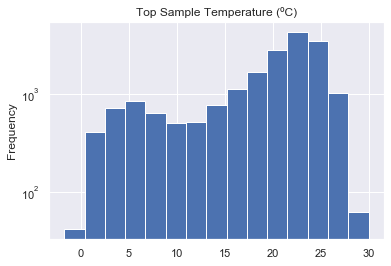

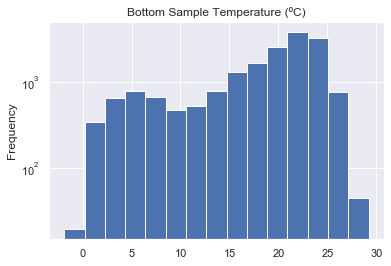

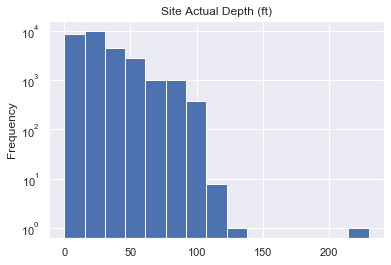

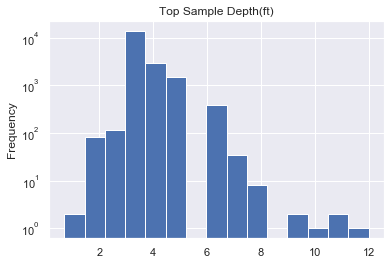

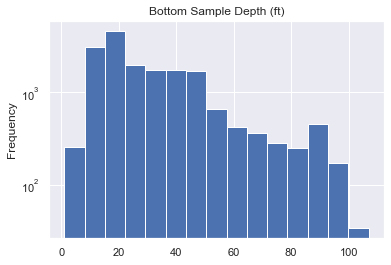

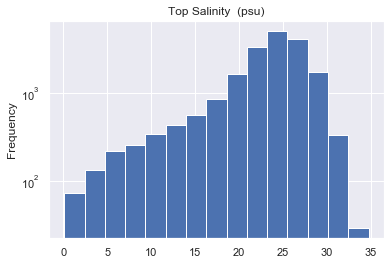

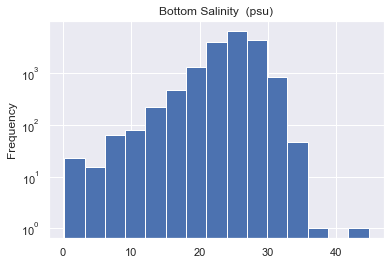

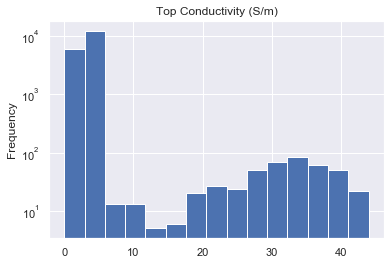

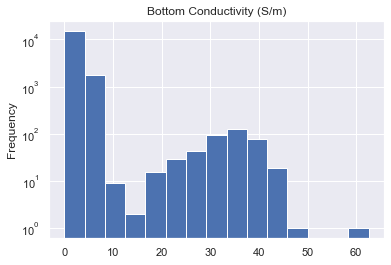

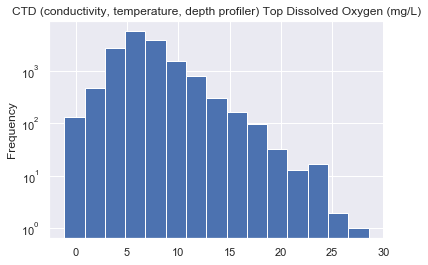

In [4]:
for col in wq_df_int_subset:
    _ = plt.figure()
    _ = wq_df_int[col].plot(kind='hist', bins=15)
    _ = plt.yscale('log')
    _ = plt.title(col)
    _ = plt.show()

- Columns with Questionable Values:
Site Actual Depth (max), Bottom Salinity (max), Bottom Conductivity (max)

In [5]:
wq_df_int_subset = wq_df_int.iloc[:, 10:20]
wq_df_int_subset.describe()

,"CTD (conductivity, temperature, depth profiler) Bottom Dissolved Oxygen (mg/L)",Percentage O2 Saturation Top Sample,Percentage O2 Saturation Bottom sample,Light Trans (% transparency) Top Sample,Light Trans (% transparency) Bottom Sample,Top Sigma-T (kg/m3),Bottom Sigma-T (kg/m3),Top Fluorometer (mg/m3),Bottom Fluorometer mg/m3,Top Sample Photosysthetically Active Radiation Reference (400-700nm light (uE/S)
count,15022.000000,17730.000000,16556.000000,11998.000000,11036.000000,18558.000000,17365.000000,15424.000000,14169.000000,11542.000000
mean,5.937268,81.913248,69.604548,59.592174,58.885732,15.648450,17.274156,16.224487,11.260035,1448.260487
std,2.735208,30.885682,25.489317,21.562496,23.318782,4.181427,3.212789,20.669278,14.166941,675.377857
min,-3.670000,-15.900000,-51.670000,-22.860000,-13.470000,-2.720000,-2.590000,-5.825500,-4.698800,0.000000
25%,4.390000,64.600000,56.585000,50.985000,50.600000,14.130000,15.690000,3.360000,2.800000,877.595000
50%,5.630000,78.780000,70.590000,65.400000,66.680000,16.320000,17.410000,8.735400,6.154700,1670.975000
75%,7.100000,93.207500,83.002500,73.960000,74.692500,18.110000,19.200000,20.213850,14.786900,1965.475000
max,29.670000,374.220000,283.240000,131.730000,130.550000,38.940000,31.510000,241.469500,196.503000,4027.700000


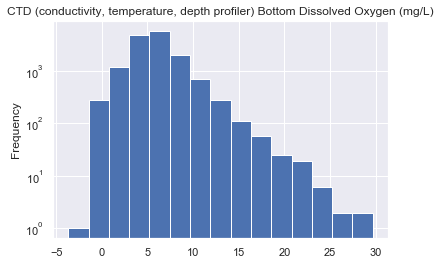

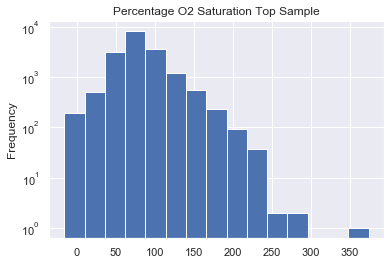

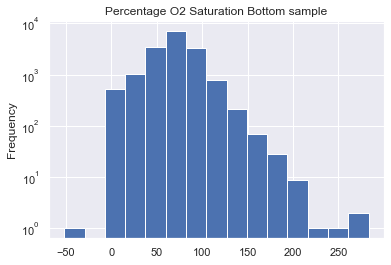

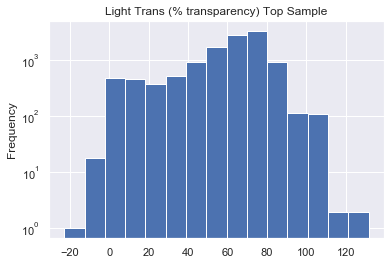

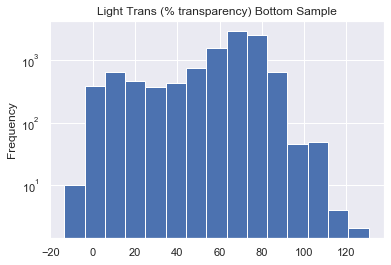

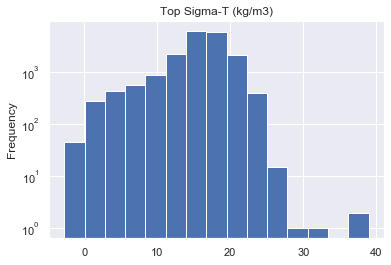

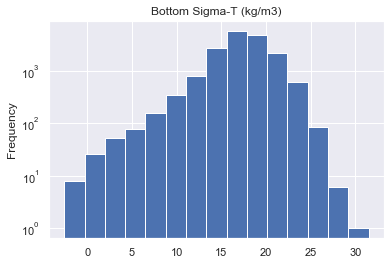

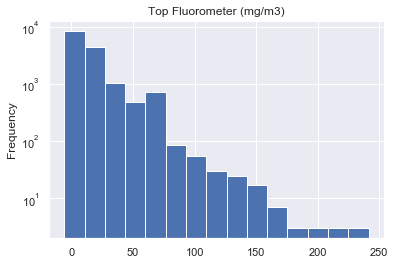

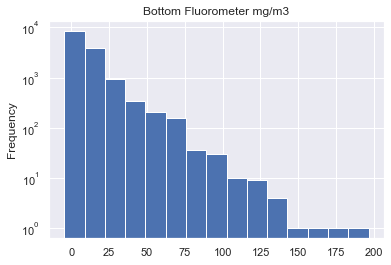

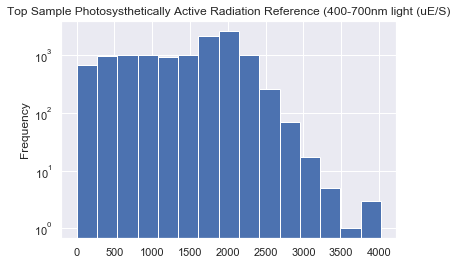

In [6]:
for col in wq_df_int_subset:
    _ = plt.figure()
    _ = wq_df_int[col].plot(kind='hist', bins=15)
    _ = plt.yscale('log')
    _ = plt.title(col)
    _ = plt.show()

- Questionable values:
Percentage O2 Sat Top (max), Percentage O2 Bottom (min, max), Top sigma (max), 

In [7]:
wq_df_int_subset = wq_df_int.iloc[:, 20:30]
wq_df_int_subset.describe()

,Top Sample Par (uE/S m2),Bottom Sample Par uE/S (uE/S m2),Oxidation Reduction Potential (mV) Top Sample,Oxidation Reduction Potential (mV) Bottom Sample,Winkler Method Top Dissolved Oxygen (mg/L),Winkler Method Bottom Dissolved Oxygen (mg/L),Secchi Depth (ft),Top PH,Bottom PH,Top Fecal Coliform Bacteria (Cells/100mL)
count,12577.000000,11639.000000,12333.000000,11414.000000,22797.000000,20295.000000,23022.000000,27625.000000,20673.000000,28862.000000
mean,1039.664966,21.450814,184.207865,184.500299,7.465010,6.761521,3.922993,7.649962,7.624497,2508.636096
std,1208.230907,78.128448,114.764149,119.531039,2.781568,2.676117,1.872168,0.557454,0.574186,15523.986296
min,-3.260000,-14.860000,-453.000000,-455.000000,0.000000,0.000000,0.500000,0.330000,0.000000,0.000000
25%,99.580000,0.000000,127.056000,124.108750,5.600000,5.080000,3.000000,7.400000,7.400000,11.000000
50%,452.000000,0.070000,188.857000,187.991500,6.960000,6.320000,3.500000,7.620000,7.600000,50.000000
75%,1811.000000,8.000000,238.850000,241.260000,9.030000,8.160000,5.000000,7.870000,7.830000,264.000000
max,31579.900000,2363.000000,1165.560000,1131.620000,23.980000,87.210000,28.500000,78.000000,75.000000,200000.000000


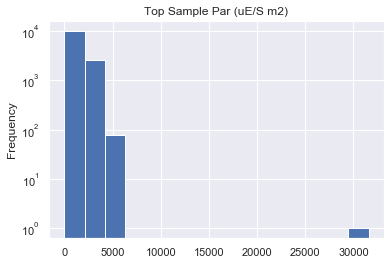

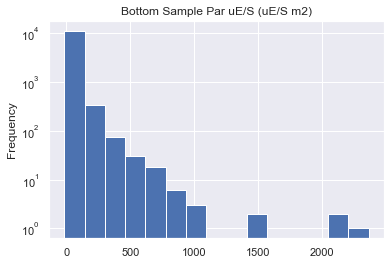

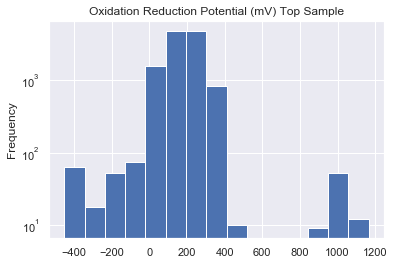

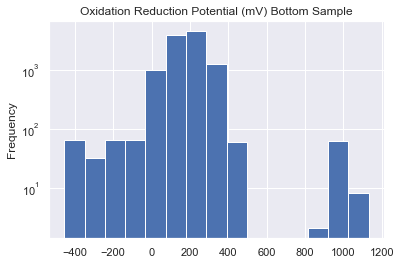

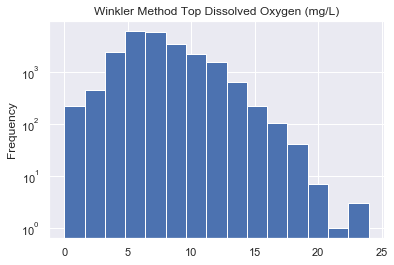

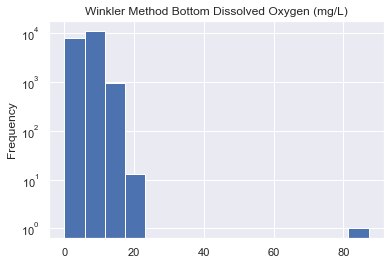

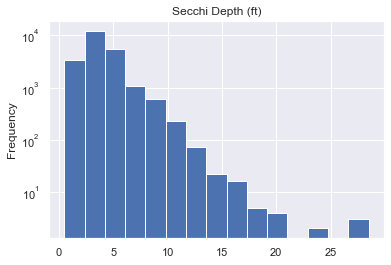

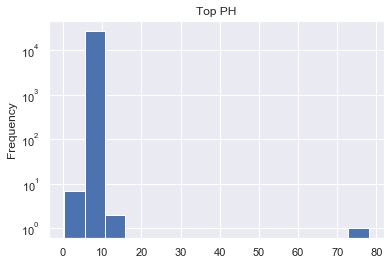

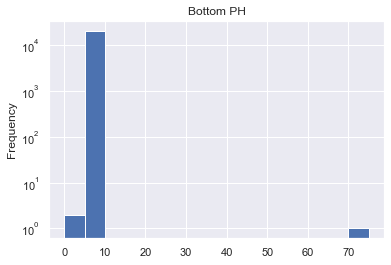

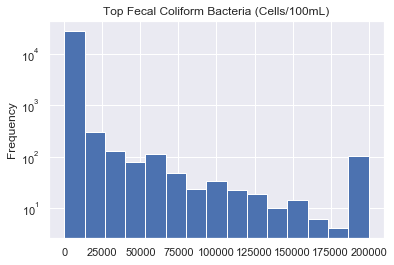

In [8]:
for col in wq_df_int_subset:
    _ = plt.figure()
    _ = wq_df_int[col].plot(kind='hist', bins=15)
    _ = plt.yscale('log')
    _ = plt.title(col)
    _ = plt.show()

- Questionable values: Top Sample Par (max), Bottom Sample Par (max), Oxidation Reduction Potential Top (max), Oxidation Reduction Potential Bottom (max), Wincler Method Bottom DO (max), Top pH (max), Bottom pH (max), Top Fecal (max)

In [9]:
wq_df_int_subset = wq_df_int.iloc[:, 30:40]
wq_df_int_subset.describe()

,Top Enterococci Bacteria (Cells/100mL),Top Nitrate/Nitrite (mg/L),Top Ammonium (mg/L),Top Ortho-Phosphorus (mg/L),Top Total Kjeldhal Nitrogen (mg/L),Top Silica (mg/L),Total Phosphorus(mg/L),Top Total Suspended Solid (mg/L),Bottom Total Suspended Solid (mg/L),Top Active Chlorophyll 'A' (µg/L)
count,28903.000000,28602.000000,28574.000000,19297.000000,28533.000000,28507.000000,28554.000000,28503.000000,20709.000000,28474.000000
mean,463.049614,0.388856,0.452576,0.165340,1.183278,2.151428,0.249150,14.555029,17.591278,16.219485
std,5052.267825,0.566747,0.918426,0.275925,1.865418,2.331622,0.330311,18.827639,21.909812,25.121986
min,0.000000,0.001000,0.002000,0.000000,0.033000,0.014000,0.009000,0.000000,0.000000,0.090000
25%,2.000000,0.179000,0.193000,0.070000,0.608000,1.020000,0.129000,7.000000,7.400000,2.650000
50%,6.000000,0.304000,0.315000,0.115000,0.858000,1.697000,0.181000,11.000000,12.000000,6.780000
75%,32.000000,0.438000,0.472000,0.164000,1.270000,2.540000,0.258000,18.000000,21.000000,19.600000
max,200000.000000,12.100000,29.000000,5.210000,44.800000,28.834000,15.500000,1805.000000,704.400000,770.000000


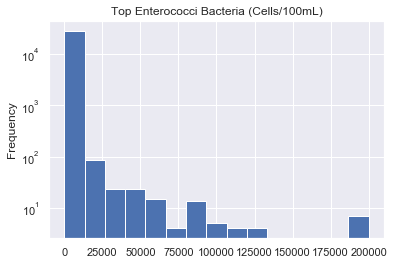

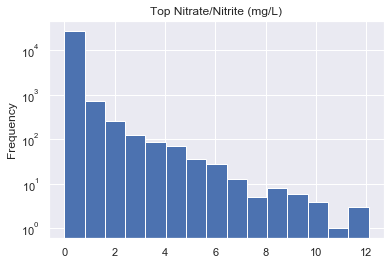

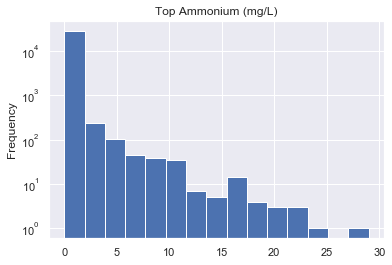

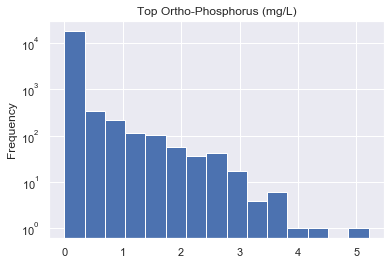

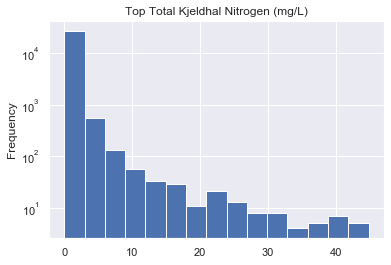

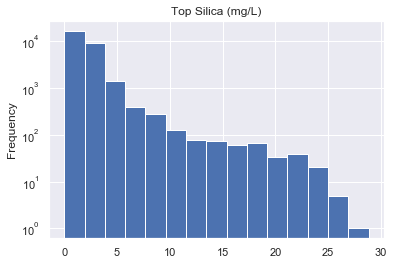

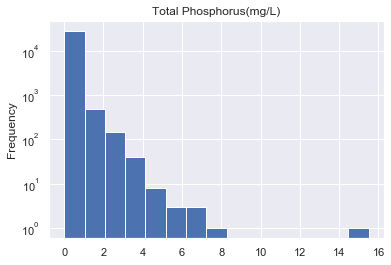

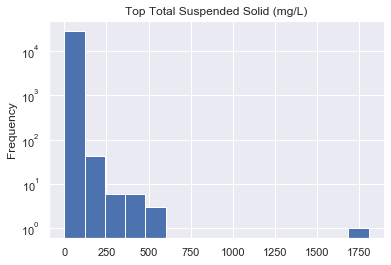

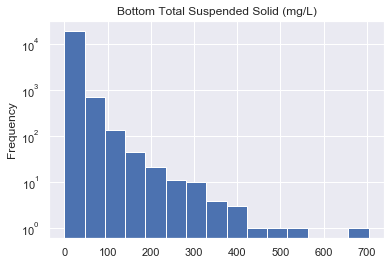

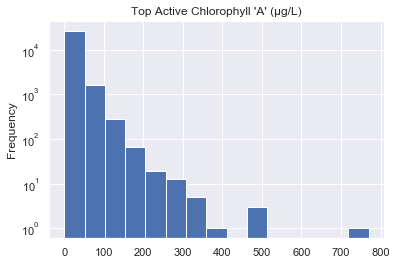

In [10]:
for col in wq_df_int_subset:
    _ = plt.figure()
    _ = wq_df_int[col].plot(kind='hist', bins=15)
    _ = plt.yscale('log')
    _ = plt.title(col)
    _ = plt.show()

- Questionable values: Top Enterrococci (max), Total Phosphorous (max), Top TSS (max), Bottom TSS (max), Top Actiive Chlorophyll (max)

In [11]:
wq_df_int_subset = wq_df_int.iloc[:, 40:]
wq_df_int_subset.describe()

,Top Dissolved Organic Carbon (mg/L),Long,Lat
count,27732.000000,31003.000000,31003.000000
mean,3.359917,-73.929836,40.691136
std,1.290050,0.117710,0.100272
min,0.500000,-74.258833,40.484500
25%,2.700000,-73.989073,40.627000
50%,3.200000,-73.899833,40.666667
75%,3.800000,-73.847613,40.782500
max,97.000000,-73.751008,40.914500


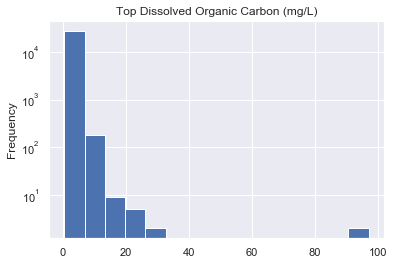

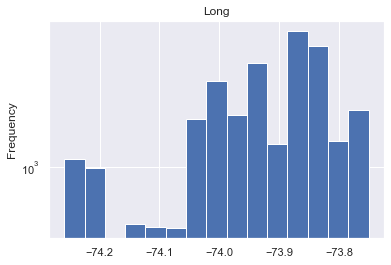

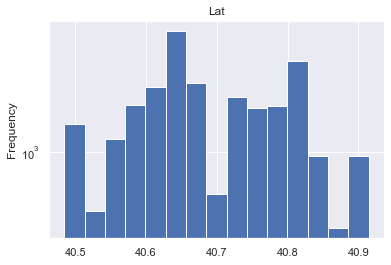

In [12]:
for col in wq_df_int_subset:
    _ = plt.figure()
    _ = wq_df_int[col].plot(kind='hist', bins=15)
    _ = plt.yscale('log')
    _ = plt.title(col)
    _ = plt.show()

- Questionable values: Total Dissolved Organic Carbon (max)